In [ ]:
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 957 kB 15.3 MB/s 
     |████████████████████████████████| 1.6 MB 65.9 MB/s 
     |████████████████████████████████| 9.3 MB 71.6 MB/s 
     |████████████████████████████████| 108 kB 90.5 MB/s 


In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 11.5 MB/s 
     |████████████████████████████████| 18.0 MB 36.3 MB/s 
     |████████████████████████████████| 240 kB 86.0 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 112 kB 87.2 MB/s 
     |████████████████████████████████| 37.5 MB 1.4 MB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
     |████████████████████████████████| 943 kB 77.9 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 4.1 MB 49.4 MB/s 
     |████████████████████████████████| 112 kB 61.0 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.1-py3-none-any.whl size=12067 sha256=c9993a7e5150b9dcd8613d85a957157631cf49565f758139ad6d7127b4688b36
  Stored in directory: /root/.cache/pip/wheels/1c/3c/a3/bf8c2931e17937329c34a88b76cb88cbb7f9f2692fa7cfbcd1
Successful

In [ ]:
!pip install pennylane-qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 21.5 MB/s 
     |████████████████████████████████| 275 kB 70.6 MB/s 


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import re
import csv
import random
import string
import multiprocessing
import itertools
import random
import csv
import statistics
import string
import random
import pennylane as qml

In [ ]:
class SimplifiedAES(object):
    """Simplified AES is a simplified version of AES algorithm"""

    # S-Box
    sBox = [
        0x9,
        0x4,
        0xA,
        0xB,
        0xD,
        0x1,
        0x8,
        0x5,
        0x6,
        0x2,
        0x0,
        0x3,
        0xC,
        0xE,
        0xF,
        0x7,
    ]

    # Inverse S-Box
    sBoxI = [
        0xA,
        0x5,
        0x9,
        0xB,
        0x1,
        0x7,
        0x8,
        0xF,
        0x6,
        0x0,
        0x2,
        0x3,
        0xC,
        0x4,
        0xD,
        0xE,
    ]

    def __init__(self, key):
        # Round keys: K0 = w0 + w1; K1 = w2 + w3; K2 = w4 + w5
        self.pre_round_key, self.round1_key, self.round2_key = self.key_expansion(key)

    def sub_word(self, word):
        """ Substitute word
        :param word: word
        """
        # Take each nibble in the word and substitute another nibble for it using
        # the Sbox table
        return (self.sBox[(word >> 4)] << 4) + self.sBox[word & 0x0F]

    def rot_word(self, word):
        """ Rotate word
        :param word: word
        """
        # Swapping the two nibbles in the word since eqv to rotate here
        return ((word & 0x0F) << 4) + ((word & 0xF0) >> 4)

    def key_expansion(self, key):
        """Key expansion
        Creates three 16-bit round keys from one single 16-bit cipher key
        Cipher Key : | n0 | n1 | n2 | n3 |
        w[0]       : | n0 | n1 |
        w[1]       : | n2 | n3 |
        for i % 2 == 0:
            w[i] : w[i - 2] XOR (SubWord(RotWord(W[i-1])) XOR RC[Nr])
        else:
            w[i] = w[i - 1] XOR w[i - 2]
        :param key: key to be used for encryption and/or decryption
        :returns: Tuple containing pre-round, round 1 and round 2 key in order
        """

        # Round constants
        Rcon1 = 0x80
        Rcon2 = 0x30

        # Calculating value of each word
        w = [None] * 6
        w[0] = (key & 0xFF00) >> 8
        w[1] = key & 0x00FF
        w[2] = w[0] ^ (self.sub_word(self.rot_word(w[1])) ^ Rcon1)
        w[3] = w[2] ^ w[1]
        w[4] = w[2] ^ (self.sub_word(self.rot_word(w[3])) ^ Rcon2)
        w[5] = w[4] ^ w[3]

        return (
            self.int_to_state((w[0] << 8) + w[1]),  # Pre-Round key
            self.int_to_state((w[2] << 8) + w[3]),  # Round 1 key
            self.int_to_state((w[4] << 8) + w[5]),  # Round 2 key
        )

    def gf_mult(self, a, b):
        """Galois field multiplication of a and b in GF(2^4) / x^4 + x + 1
        :param a: First number
        :param b: Second number
        :returns: Multiplication of both under GF(2^4)
        """
        # Initialise
        product = 0

        # Mask the unwanted bits
        a = a & 0x0F
        b = b & 0x0F

        # While both multiplicands are non-zero
        while a and b:

            # If LSB of b is 1
            if b & 1:

                # Add current a to product
                product = product ^ a

            # Update a to a * 2
            a = a << 1

            # If a overflows beyond 4th bit
            if a & (1 << 4):

                # XOR with irreducible polynomial with high term eliminated
                a = a ^ 0b10011

            # Update b to b // 2
            b = b >> 1

        return product

    def int_to_state(self, n):
        """Convert a 2-byte integer into a 4-element vector (state matrix)
        :param m: integer
        :returns: state corresponding to the integer
        """
        return [n >> 12 & 0xF, (n >> 4) & 0xF, (n >> 8) & 0xF, n & 0xF]

    def state_to_int(self, m):
        """Convert a 4-element vector (state matrix) into 2-byte integer
        :param m: state
        :returns: integer corresponding to the state
        """
        return (m[0] << 12) + (m[2] << 8) + (m[1] << 4) + m[3]

    def add_round_key(self, s1, s2):
        """Add round keys in GF(2^4)
        :param s1: First number
        :param s2: Second number
        :returns: Addition of both under GF(2^4)
        """
        return [i ^ j for i, j in zip(s1, s2)]

    def sub_nibbles(self, sbox, state):
        """Nibble substitution
        :param sbox: Substitution box to use for transformatin
        :param state: State to perform sub nibbles transformation on
        :returns: Resultant state
        """
        return [sbox[nibble] for nibble in state]

    def shift_rows(self, state):
        """Shift rows and inverse shift rows of state matrix (same)
        :param state: State to perform shift rows transformation on
        :returns: Resultant state
        """
        return [state[0], state[1], state[3], state[2]]

    def mix_columns(self, state):
        """Mix columns transformation on state matrix
        :param state: State to perform mix columns transformation on
        :returns: Resultant state
        """
        return [
            state[0] ^ self.gf_mult(4, state[2]),
            state[1] ^ self.gf_mult(4, state[3]),
            state[2] ^ self.gf_mult(4, state[0]),
            state[3] ^ self.gf_mult(4, state[1]),
        ]

    def inverse_mix_columns(self, state):
        """Inverse mix columns transformation on state matrix
        :param state: State to perform inverse mix columns transformation on
        :returns: Resultant state
        """
        return [
            self.gf_mult(9, state[0]) ^ self.gf_mult(2, state[2]),
            self.gf_mult(9, state[1]) ^ self.gf_mult(2, state[3]),
            self.gf_mult(9, state[2]) ^ self.gf_mult(2, state[0]),
            self.gf_mult(9, state[3]) ^ self.gf_mult(2, state[1]),
        ]

    def encrypt(self, plaintext):
        """Encrypt plaintext with given key
        Example::
            ciphertext = SimplifiedAES(key=0b0100101011110101).encrypt(0b1101011100101000)
        :param plaintext: 16 bit plaintext
        :returns: 16 bit ciphertext
        """
        state = self.add_round_key(self.pre_round_key, self.int_to_state(plaintext))

        state = self.mix_columns(self.shift_rows(self.sub_nibbles(self.sBox, state)))

        state = self.add_round_key(self.round1_key, state)

        state = self.shift_rows(self.sub_nibbles(self.sBox, state))

        state = self.add_round_key(self.round2_key, state)

        return self.state_to_int(state)

In [ ]:
import numpy as np
from os import urandom
import numpy as np
from os import urandom
import random

# 8pt -> 16pt

#convert_to_binary takes as input an array of ciphertext pairs
#where the first row of the array contains the lefthand side of the ciphertexts,
#the second row contains the righthand side of the ciphertexts,
#the third row contains the lefthand side of the second ciphertexts,
#and so on
#it returns an array of bit vectors containing the same data

def WORD_SIZE():
    return(8);

'''
def ALPHA():
    return(7);

def BETA():
    return(2);
'''

def convert_to_binary(arr):
  X = np.zeros((4 * WORD_SIZE(),len(arr[0])),dtype=np.uint8);
  for i in range(4 * WORD_SIZE()):
    index = i // WORD_SIZE();
    offset = WORD_SIZE() - (i % WORD_SIZE()) - 1;
    X[i] = (arr[index] >> offset) & 1;
  X = X.transpose();
  return(X);

#takes a text file that contains encrypted block0, block1, true diff prob, real or random
#data samples are line separated, the above items whitespace-separated
#returns train data, ground truth, optimal ddt prediction
def readcsv(datei):
    data = np.genfromtxt(datei, delimiter=' ', converters={x: lambda s: int(s,16) for x in range(2)});
    X0 = [data[i][0] for i in range(len(data))];
    X1 = [data[i][1] for i in range(len(data))];
    Y = [data[i][3] for i in range(len(data))];
    Z = [data[i][2] for i in range(len(data))];
    ct0a = [X0[i] >> 16 for i in range(len(data))];
    ct1a = [X0[i] & MASK_VAL for i in range(len(data))];
    ct0b = [X1[i] >> 16 for i in range(len(data))];
    ct1b = [X1[i] & MASK_VAL for i in range(len(data))];
    ct0a = np.array(ct0a, dtype=np.uint16); ct1a = np.array(ct1a,dtype=np.uint16);
    ct0b = np.array(ct0b, dtype=np.uint16); ct1b = np.array(ct1b, dtype=np.uint16);
    
    #X = [[X0[i] >> 16, X0[i] & 0xffff, X1[i] >> 16, X1[i] & 0xffff] for i in range(len(data))];
    X = convert_to_binary([ct0a, ct1a, ct0b, ct1b]); 
    Y = np.array(Y, dtype=np.uint8); Z = np.array(Z);
    return(X,Y,Z);

#baseline training data generator
def make_train_data(n, nr, diff=(0x80,0x00)):


  plain0l = np.zeros(shape=(n,),dtype=int)
  plain0r = np.zeros(shape=(n,),dtype=int)
  plain1l = np.zeros(shape=(n,),dtype=int)
  plain1r = np.zeros(shape=(n,),dtype=int)

  '''
  plain = random.randint(0, 255)
  masterkey = random.randint(0, 127)
  cipher = Present(plain, masterkey, rounds)
  '''

  for i in range(n):
    plain0l[i] = random.randint(0, 255) # 8-bit
    plain0r[i] = random.randint(0, 255) # 8-bit

    plain1l[i] = plain0l[i] ^ diff[0];
    plain1r[i] = plain0r[i] ^ diff[1];

  Y = np.ones(shape=(n,)) # cipher

  for i in range(int(n/2)):
    plain1l[i] = random.randint(0, 255)
    plain1r[i] = random.randint(0, 255)
    Y[i] = 0 # random 

  plain0 = np.zeros(shape=(n,),dtype=int)
  plain1 = np.zeros(shape=(n,),dtype=int)
  ctdata0 = np.zeros(shape=(n,),dtype=int)
  ctdata1 = np.zeros(shape=(n,),dtype=int)

  ctdata0r = np.zeros(shape=(n,),dtype=int)
  ctdata0l = np.zeros(shape=(n,),dtype=int)
  ctdata1r = np.zeros(shape=(n,),dtype=int)
  ctdata1l = np.zeros(shape=(n,),dtype=int)
  
  for i in range(n):

    plain0[i] = int(256*(plain0l[i]) + plain0r[i]) 
    plain1[i] = int(256*(plain1l[i]) + plain1r[i])

    ks = random.randint(0, 65535)
    ctdata0[i] = SimplifiedAES(ks).encrypt(plain0[i])
    ctdata1[i] =  SimplifiedAES(ks).encrypt(plain1[i])

    ctdata0r[i] = ctdata0[i] % 256
    ctdata0l[i] = ctdata0[i] >> 8

    ctdata1r[i] = ctdata1[i] % 256
    ctdata1l[i] = ctdata1[i] >> 8

  X = convert_to_binary([ctdata0l, ctdata0r, ctdata1l, ctdata1r]); 

  return(X,Y);

In [ ]:
num_rounds=2
x_train, y_train = make_train_data(2000,num_rounds); #10**7
x_val, y_val = make_train_data(400,num_rounds); #10**7
x_test, y_test = make_train_data(100,num_rounds); #10**7

x_train = np.asarray(x_train)
x_val = np.asarray(x_val)
x_test = np.asarray(x_test)

y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)


y_train = y_train.reshape((len(y_train),1))
y_val = y_val.reshape((len(y_val),1))
y_test = y_test.reshape((len(y_test),1))

In [ ]:
x_train

array([[1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]], dtype=uint8)

In [ ]:
y_test.shape

(100, 1)

In [ ]:
from qiskit import IBMQ

#IBMQ.save_account('8a0997aa57a8c45def4615c38d2b617b29c5ee728244e29dc085ccbb6c49a5dcd29a26834b8cd67f70d4e633b7105837c8a1157e565c3bf0688919106f36fe51',overwrite=True)
IBMQ.save_account('2d44b46106dc0f0ac0c4c6dbd929fa20687830c31a00ca1cde97e28e4d897af34e34d719f97e04db8313f28ec91922b1663f59be50795e586025955124eff17c', overwrite=True)
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-research-2', group='hansung-uni-1', project='main')>]

In [ ]:
provider = IBMQ.get_provider(hub='ibm-q-research-2')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-research-2', group='hansung-uni-1', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-research-2', group='hansung-uni-1', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-research-2', group='hansung-uni-1', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-research-2', group='hansung-uni-1', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-research-2', group='hansung-uni-1', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-research-2', group='hansung-uni-1', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-research-2', group='hansung-uni-1', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-research-2', group='hansung-uni-1', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q-research-2', group='hansung-uni-1', project='main')>,
 <IBMQSimulator('simulator_extended_stab

Basic

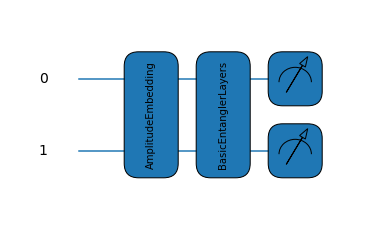

In [ ]:
import pennylane as qml

n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)
#dev = qml.device('qiskit.ibmq', wires=1, backend='ibmq_qasm_simulator', ibmqx_token="2d44b46106dc0f0ac0c4c6dbd929fa20687830c31a00ca1cde97e28e4d897af34e34d719f97e04db8313f28ec91922b1663f59be50795e586025955124eff17c")
@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AmplitudeEmbedding(inputs, wires=range(n_qubits), pad_with=0, normalize=True)
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

n_layers = 5
weight_shapes = {"weights": (n_layers, n_qubits)}
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

w = np.ones((n_layers, n_qubits))
inputssss = np.ones((32,4))
fig, ax = qml.draw_mpl(qnode)(inputssss,w)
fig.show()

Random + Amplitude

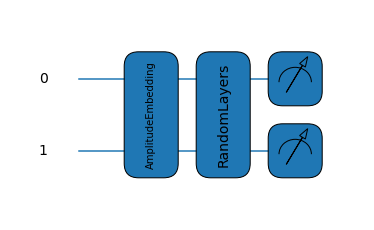

In [ ]:
import pennylane as qml
from pennylane import numpy as np

n_qubits = 2

dev = qml.device("default.qubit", wires=n_qubits)
#dev = qml.device('qulacs.simulator', wires=n_qubits) 

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AmplitudeEmbedding(inputs, wires=range(n_qubits), pad_with=0, normalize=True)
    qml.RandomLayers(weights=weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

n_layers = 5
weight_shapes = {"weights": (n_layers, n_qubits)}
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

w = np.ones((n_layers, n_qubits))
inputssss = np.ones((32,4))
fig, ax = qml.draw_mpl(qnode)(inputssss,w)
fig.show()

Strong

In [ ]:
n_qubits = 2

#dev = qml.device("default.mixed", wires=n_qubits)

dev = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev) # , interface="tf", diff_method="backprop 
def qnode(inputs, weights):
    qml.AmplitudeEmbedding(inputs, wires=range(n_qubits), pad_with=0, normalize=True)
    qml.StronglyEntanglingLayers(weights=weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [ ]:
n_layers = 10
weight_shapes = {"weights": (n_layers, n_qubits,3)}
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

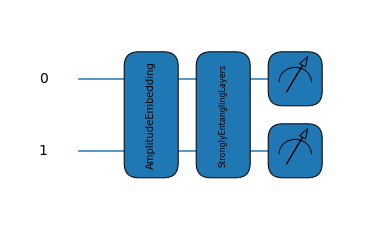

In [ ]:
w = np.ones((n_layers, n_qubits,3))
inputssss = np.ones((32,4))
fig, ax = qml.draw_mpl(qnode)(inputssss,w)
fig.show()

In [ ]:
# re-define the layers
clayer_1 = tf.keras.layers.Dense(16)
# qubit 수 * 양자회로 수 는 맞아야 함

q1 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
q2 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
q3 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
q4 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

'''
q5 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
q6 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
q7 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
q8 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
'''

output_layer = tf.keras.layers.Dense(1, activation = 'sigmoid')

# construct the model
inputs = tf.keras.Input(shape=(32,))
x = clayer_1(inputs)

x1, x2, x3, x4 = tf.split(x, 4, axis=1)

#x1, x2, x3, x4, x5, x6, x7, x8 = tf.split(x, 8, axis=1)


x1 = q1(x1)
x2 = q2(x2)
x3 = q3(x3)
x4 = q4(x4)
'''
x5 = q5(x5)
x6 = q6(x6)
x7 = q7(x7)
x8 = q8(x8)
'''

x = tf.concat([x1,x2,x3,x4], axis=1)
#x = tf.concat([x1,x2,x3,x4,x5, x6, x7, x8], axis=1)
outputs = output_layer(x)

q1.build((32,4))
q2.build((32,4))
q3.build((32,4))
q4.build((32,4))
'''
q5.build((32,4))
q6.build((32,4))
q7.build((32,4))
q8.build((32,4))
'''

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model. summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           528         ['input_1[0][0]']                
                                                                                                  
 tf.split (TFOpLambda)          [(None, 4),          0           ['dense[0][0]']                  
                                 (None, 4),                                                       
                                 (None, 4),                                                       
                                 (None, 4)]                                                   

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(opt, loss="binary_crossentropy", metrics=["acc"])

In [ ]:
fitting = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data = (x_val, y_val), verbose=2)

Epoch 1/25
63/63 - 2066s - loss: 0.7024 - acc: 0.5225 - val_loss: 0.6866 - val_acc: 0.5540 - 2066s/epoch - 33s/step
Epoch 2/25
63/63 - 2067s - loss: 0.6768 - acc: 0.5675 - val_loss: 0.6726 - val_acc: 0.5880 - 2067s/epoch - 33s/step
Epoch 3/25
63/63 - 2062s - loss: 0.6604 - acc: 0.6105 - val_loss: 0.6570 - val_acc: 0.6020 - 2062s/epoch - 33s/step
Epoch 4/25
63/63 - 2055s - loss: 0.6394 - acc: 0.6565 - val_loss: 0.6319 - val_acc: 0.6480 - 2055s/epoch - 33s/step
Epoch 5/25
63/63 - 2052s - loss: 0.6108 - acc: 0.6955 - val_loss: 0.6031 - val_acc: 0.6680 - 2052s/epoch - 33s/step
Epoch 6/25
63/63 - 2063s - loss: 0.5703 - acc: 0.7365 - val_loss: 0.5604 - val_acc: 0.7240 - 2063s/epoch - 33s/step
Epoch 7/25
63/63 - 2054s - loss: 0.5166 - acc: 0.7860 - val_loss: 0.5098 - val_acc: 0.7620 - 2054s/epoch - 33s/step
Epoch 8/25
63/63 - 2038s - loss: 0.4490 - acc: 0.8415 - val_loss: 0.4515 - val_acc: 0.8180 - 2038s/epoch - 32s/step
Epoch 9/25
63/63 - 2068s - loss: 0.3797 - acc: 0.8830 - val_loss: 0.3838

In [ ]:
predicted_labels = model.predict(np.array(x_test))

res = np.array(predicted_labels > 0.5, dtype = int)

res = res.reshape((len(x_test)))
y_test = y_test.reshape((len(y_test)))

total = 0

for i in range(len(res)):
    if res[i] == y_test[i]:
        total += 1

print(total/len(x_test))
